In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


C:\Users\sidbh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sidbh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sidbh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

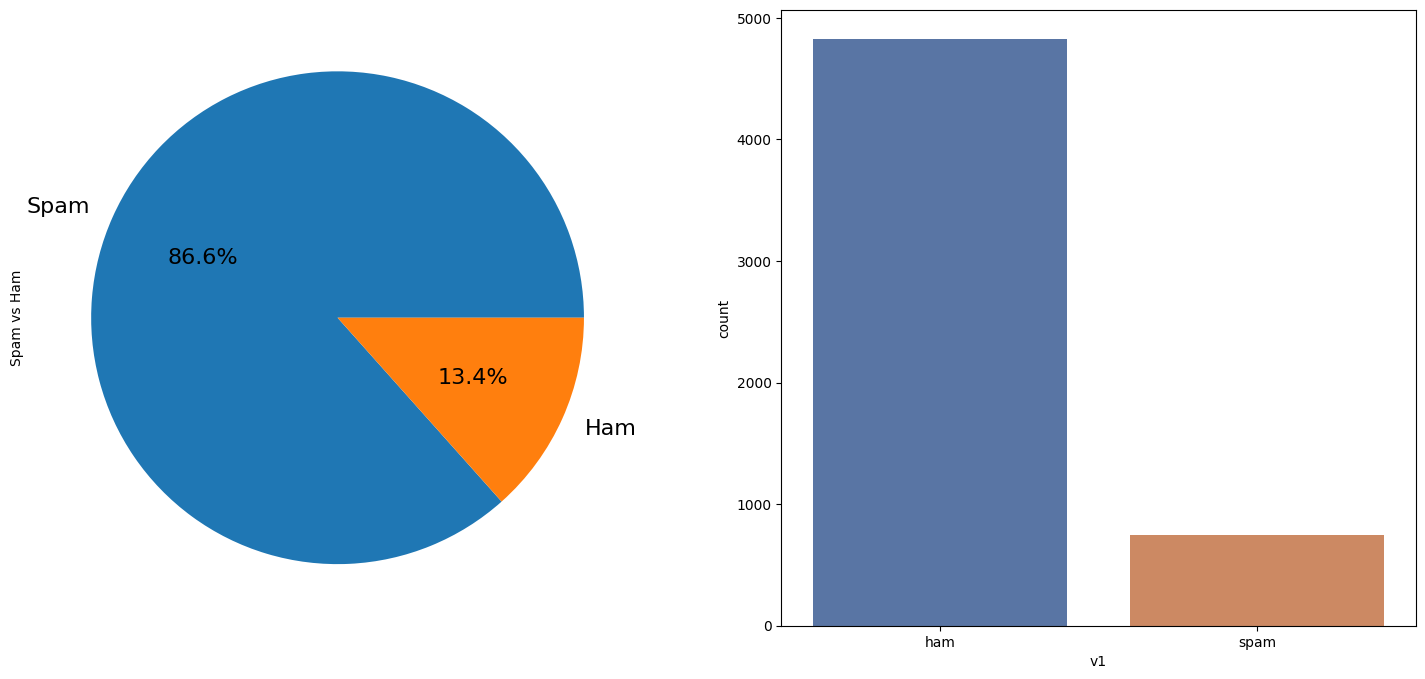

In [6]:
#spam v ham chart
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df.v1.value_counts().plot(kind="pie", fontsize=16,labels=["Spam", "Ham"], 
                          ylabel="Spam vs Ham", autopct='%1.1f%%'); 

plt.subplot(1, 2, 2)
sns.countplot(x="v1",data=df, palette="deep")
plt.show()

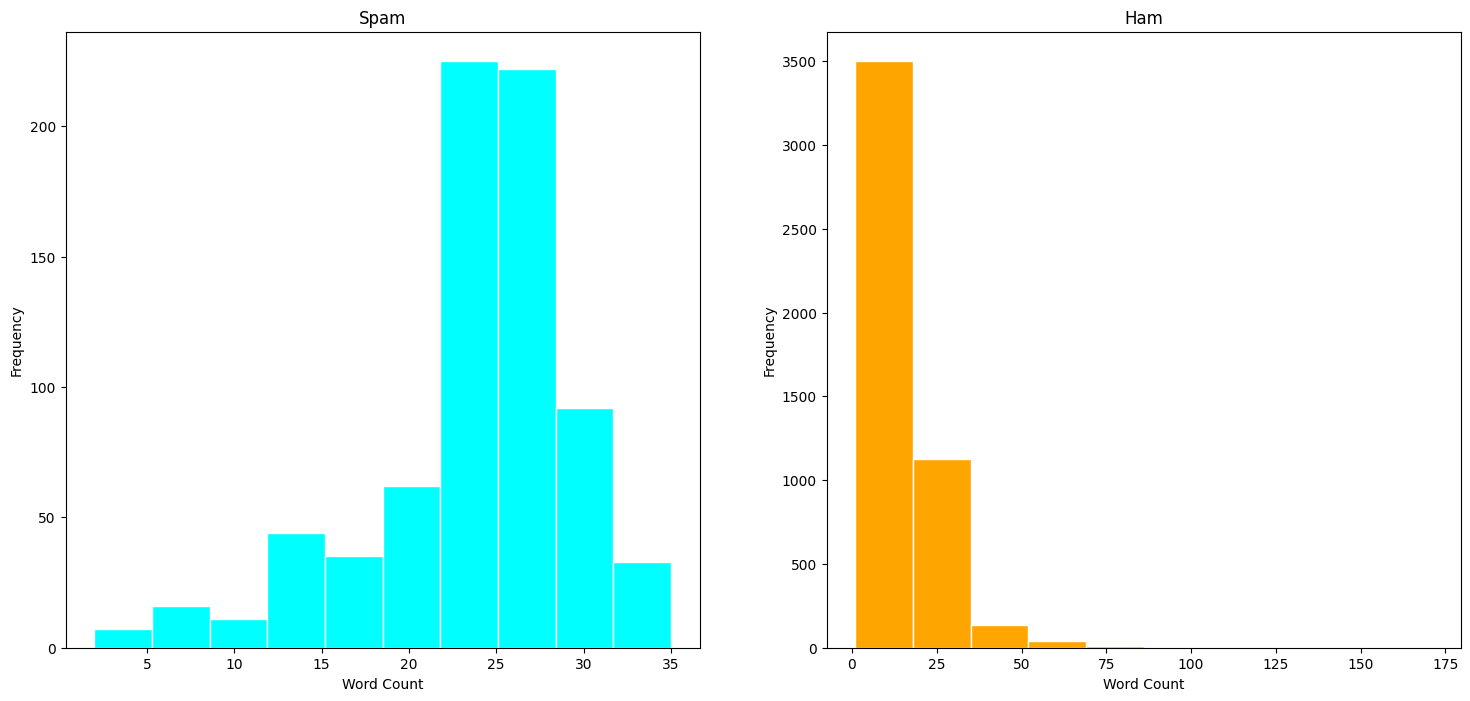

In [9]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
spam_lengths = df[df['v1'] == 'spam']['v2'].apply(lambda x: len(x.split()))
plt.hist(spam_lengths, color="cyan", edgecolor='white')
plt.title("Spam")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
ham_lengths = df[df['v1'] == 'ham']['v2'].apply(lambda x: len(x.split()))
plt.hist(ham_lengths, color="orange", edgecolor='white')
plt.title("Ham")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidbh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




Word Cloud for Spam messages




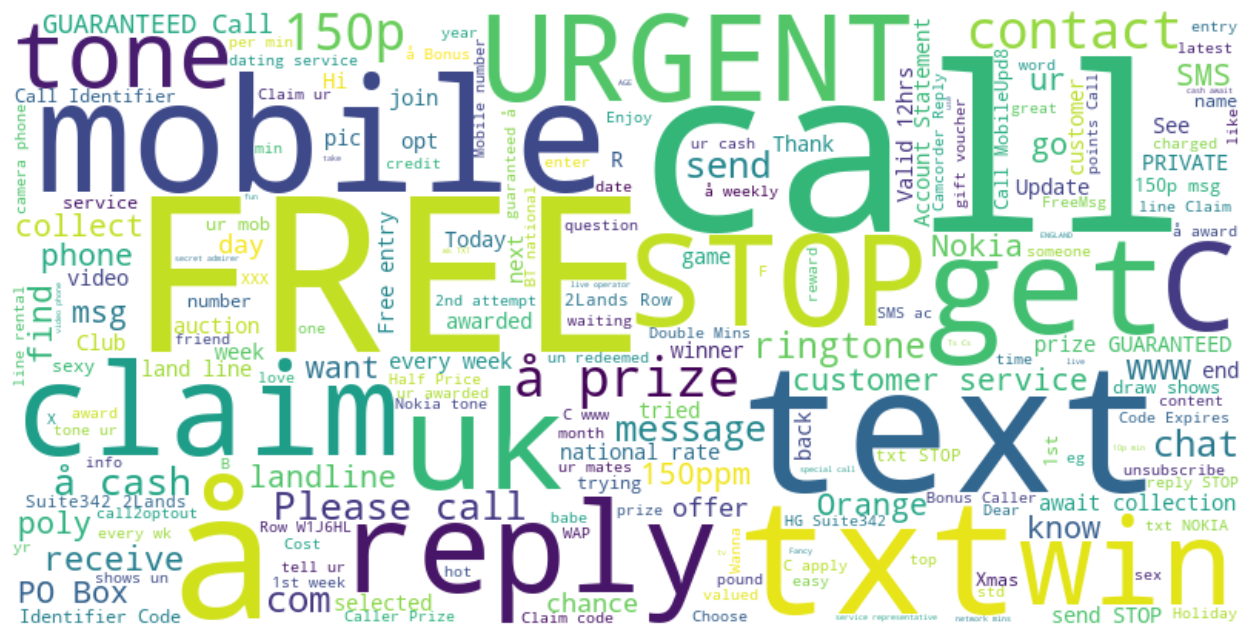



Word Cloud for Ham messages




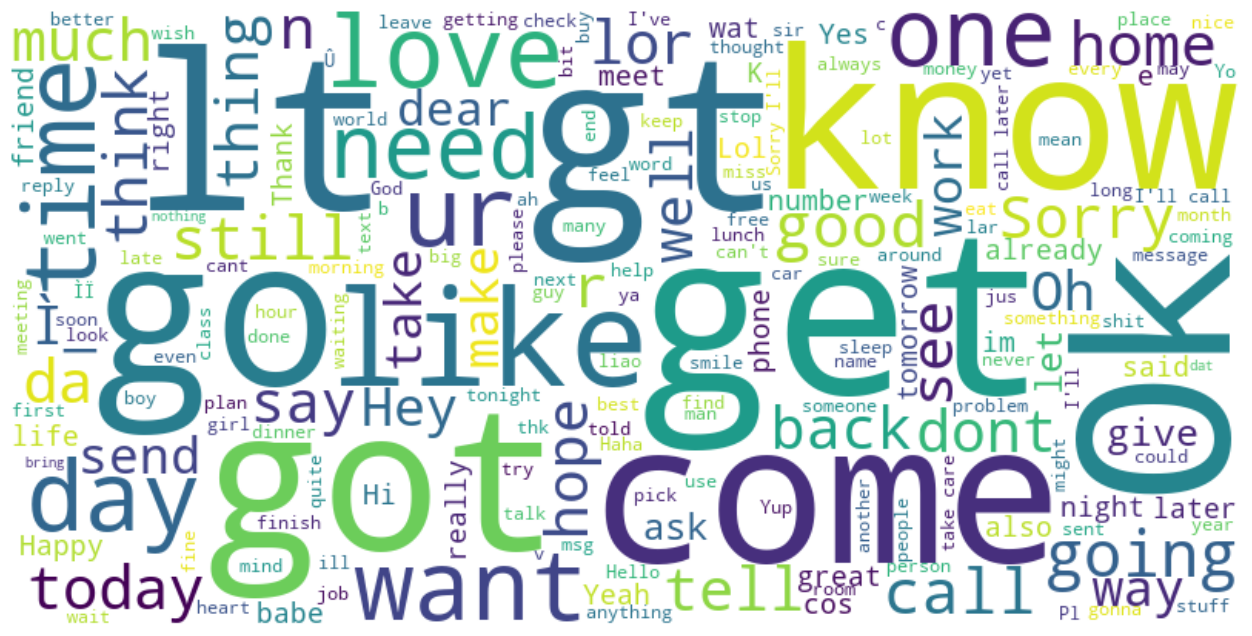

In [10]:
#word cloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
stop_words= set(stopwords.words("english"))

stop_words.update(['https', 'http', 'amp', 'CO', 't', 'u', 'new', "I'm", "would"])

wc = WordCloud(width=800,
               height=400,
               max_words=200,
               stopwords=stop_words,
               background_color='white',
               max_font_size=150)
spam = df.query("v1=='spam'").v2.str.cat(sep=" ")

ham = df.query("v1=='ham'").v2.str.cat(sep=" ")

print('\n\nWord Cloud for Spam messages\n\n')
wc.generate(spam)
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

print('\n\nWord Cloud for Ham messages\n\n')
wc.generate(ham)
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
df = df.replace('spam', 1)
df = df.replace('ham', 0)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [12]:
#Removing unnnecessary symbols
def cleanText(text):
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = text.replace('.', '')
    text = whitespace.sub(' ', text)
    text = web_address.sub('', text)
    text = user.sub('', text)
    text = re.sub(r"\[[^()]*\]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    return text.lower()

df.v2 = [cleanText(item) for item in df.v2]
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go until jurong point crazy available only in ...,NaN,NaN,NaN
1,0,ok lar joking wif u oni,NaN,NaN,NaN
2,1,free entry in a wkly comp to win fa cup final...,NaN,NaN,NaN
3,0,u dun say so early hor u c already then say,NaN,NaN,NaN
4,0,nah i dont think he goes to usf he lives aroun...,NaN,NaN,NaN
...,...,...,...,...,...
5567,1,this is the nd time we have tried contact u u...,NaN,NaN,NaN
5568,0,will ì_ b going to esplanade fr home,NaN,NaN,NaN
5569,0,pity was in mood for that soany other suggest...,NaN,NaN,NaN
5570,0,the guy did some bitching but i acted like id ...,NaN,NaN,NaN


In [13]:
#checking for unique words
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.oov_token = '<oovToken>'
tokenizer.fit_on_texts(df.v2)
vocab = tokenizer.word_index
vocabCount = len(vocab)+1

vocabCount

8606

In [14]:
SPLIT = 5000

xTrain = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences
                                                       (df.v2.to_numpy()), padding='pre', maxlen=171)
yTrain = df.v1.to_numpy()
dim = xTrain.shape[1]
xTest = xTrain[SPLIT:]
yTest = yTrain[SPLIT:]

xTrain = xTrain[:SPLIT]
yTrain = yTrain[:SPLIT]

xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

((5000, 171), (5000,), (572, 171), (572,))

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocabCount+1, output_dim=64, input_length=dim))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 171, 64)           550848    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 557121 (2.13 MB)
Trainable params: 557121 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [19]:
model.fit(xTrain, yTrain, epochs=15, shuffle=True)

Epoch 1/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0079 - accuracy: 0.9984
Epoch 2/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0076 - accuracy: 0.9978
Epoch 3/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0068 - accuracy: 0.9982
Epoch 4/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 5/15
157/157 [==============================] - 1s 7ms/step - loss: 0.0072 - accuracy: 0.9986
Epoch 6/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 0.9994
Epoch 7/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0042 - accuracy: 0.9992
Epoch 8/15
157/157 [==============================] - 1s 7ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 9/15
157/157 [==============================] - 1s 7ms/step - loss: 0.0042 - accuracy: 0.9992
Epoch 10/15
157/157 [==============================] - 1s 6ms/step - loss: 0.0030 - accuracy: 0.9994

In [20]:
model.evaluate(xTest, yTest)

18/18 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9860


[0.05419888347387314, 0.9860140085220337]

In [23]:
#input request and processing
user_text = input("Enter a text example: ")

processed_user_text = cleanText(user_text)
final_user_text = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([processed_user_text]), padding='pre', maxlen=171)
prediction = model.predict(final_user_text)

# result
if prediction >= 0.5:
    print(f"You have received a SPAM text: '{user_text}' predicted with confidence {prediction[0, 0]*100:.2f}%.")
else:
    print(f"You have received a non spam text: '{user_text}' predicted with confidence {100 - prediction[0, 0]*100:.2f}%.")


1/1 [==============================] - 0s 30ms/step
You have received a non spam text: 'Would love to meet up tomorrow, let me know if you're free!' predicted with confidence 100.00%.
